<a href="https://colab.research.google.com/github/oakthyago/PDF-Data-Extraction/blob/main/Notas_Final_2_multiplas_notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdfplumber
!pip install pandas

**This project focuses on extracting structured information from PDF files that contain tables, with the goal of transforming this data into a usable dataset. The process is made feasible due to the regular format of the tables across the PDF pages, where a predefined structure and positioning can be identified. Additionally, it's worth noting that the original data was likely sourced from databases, which contributes to the consistency in the format.**

In [ ]:
import pdfplumber
import pandas as pd
import re
import os

def extrair_tabelas_pdf(caminho_pdf):
    with pdfplumber.open(caminho_pdf) as pdf:
        todas_tabelas = []
        dados_produtos_completo = ""

        # Expressão regular para capturar o bloco de 'DADOS DOS PRODUTOS / SERVIÇOS'
        padrao = r"DADOS DOS PRODUTOS / SERVIÇOS(.*?)(?=DADOS ADICIONAIS)"
        padrao_alternativo = r"DADOS DOS PRODUTOS / SERVIÇOS(.*)"

        # Itera sobre todas as páginas do PDF
        for numero_pagina, pagina in enumerate(pdf.pages, start=1):
            texto_pagina = pagina.extract_text()

            # Primeira tentativa: captura entre 'DADOS DOS PRODUTOS / SERVIÇOS' e 'DADOS ADICIONAIS'
            dados_produtos = re.search(padrao, texto_pagina, re.DOTALL)

            if dados_produtos:
                dados_produtos_completo += dados_produtos.group(0) + "\n"
            else:
                # Segunda tentativa: captura tudo depois de 'DADOS DOS PRODUTOS / SERVIÇOS' se 'DADOS ADICIONAIS' não for encontrado
                dados_produtos_fallback = re.search(padrao_alternativo, texto_pagina, re.DOTALL)

                if dados_produtos_fallback:
                    dados_produtos_completo += dados_produtos_fallback.group(0) + "\n"
                else:
                    print(f"Seção de dados do produto não encontrada na página {numero_pagina}.")

            # Agora, tenta extrair as tabelas da página dentro do bloco extraído
            if dados_produtos or dados_produtos_fallback:
                tabelas = pagina.extract_tables()

                # Se houver tabelas na página, adiciona à lista
                if tabelas:
                    for tabela in tabelas:
                        df = pd.DataFrame(tabela[1:], columns=tabela[0])  # Converte a tabela em DataFrame
                        todas_tabelas.append(df)

        return todas_tabelas, dados_produtos_completo

def processar_varios_pdfs(diretorio):
    resultados = {}

    # Itera sobre todos os arquivos PDF no diretório
    for arquivo in os.listdir(diretorio):
        if arquivo.endswith(".pdf"):
            caminho_pdf = os.path.join(diretorio, arquivo)
            tabelas, dados_textuais = extrair_tabelas_pdf(caminho_pdf)
            resultados[arquivo] = {
                "tabelas": tabelas,
                "dados_textuais": dados_textuais
            }

    return resultados

# Diretório onde as notas fiscais estão localizadas
diretorio_notas = '/content/drive/MyDrive/120/12'  # Substitua pelo caminho correto

# Processar todos os PDFs no diretório e obter os resultados
resultados = processar_varios_pdfs(diretorio_notas)

# Exibir os resultados para cada nota fiscal
#for arquivo, conteudo in resultados.items():
 #   print(f"\nDados extraídos da nota {arquivo}:\n")

    # Exibir texto extraído
  #  print("Texto extraído:\n")
   # print(conteudo["dados_textuais"])

    # Exibir tabelas extraídas
   # for idx, tabela in enumerate(conteudo["tabelas"]):
    #    print(f"\nTabela {idx + 1}:\n")
     #   print(tabela)

In [ ]:
df_concat = pd.DataFrame()

# Itera sobre os resultados de todos os PDFs
for arquivo, conteudo in resultados.items():
    print(f"Processando arquivo: {arquivo}")

    # Itera sobre as tabelas no conteúdo de cada PDF
    for idx, tabela in enumerate(conteudo["tabelas"]):
        # Verifica se 'CÓDIGO PRODUTO' está nas colunas
        if 'CÓDIGO PRODUTO' in tabela.columns:
            # Encontra o índice da coluna 'CÓDIGO PRODUTO'
            idx_codigo_produto = tabela.columns.get_loc('CÓDIGO PRODUTO')

            # Define as próximas 10 colunas após 'CÓDIGO PRODUTO'
            colunas_desejadas = tabela.columns[idx_codigo_produto:idx_codigo_produto + 10]

            # Filtra as colunas desejadas
            df_filtered = tabela[colunas_desejadas]

            # Renomeia as colunas para A, B, C, etc.
            df_filtered.columns = [chr(65 + i) for i in range(len(df_filtered.columns))]

            # Se for a primeira tabela, copia para o df_concat, caso contrário, concatena
            if df_concat.empty:
                df_concat = df_filtered.copy()
            else:
                df_concat = pd.concat([df_concat, df_filtered], ignore_index=True)

# Exibe o DataFrame concatenado
df_concat

Processando arquivo: _JUNTO (13).pdf
Processando arquivo: _JUNTO (1).pdf
Processando arquivo: _JUNTO (11).pdf
Processando arquivo: _JUNTO (10).pdf
Processando arquivo: _JUNTO (9).pdf
Processando arquivo: _JUNTO (7).pdf
Processando arquivo: _JUNTO (6).pdf
Processando arquivo: _JUNTO (4).pdf
Processando arquivo: _JUNTO (8).pdf
Processando arquivo: _JUNTO (5).pdf
Processando arquivo: _JUNTO.pdf
Processando arquivo: _JUNTO (3).pdf
Processando arquivo: _JUNTO (2).pdf
Processando arquivo: _JUNTO (18).pdf
Processando arquivo: _JUNTO (17).pdf
Processando arquivo: _JUNTO (16).pdf
Processando arquivo: _JUNTO (15).pdf
Processando arquivo: _JUNTO (14).pdf
Processando arquivo: _JUNTO (12).pdf


,A,B,C,D,E,F,G,H,I,J
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,000,6101,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,000,6101,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,000,6101,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,000,6101,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,000,6101,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",
...,...,...,...,...,...,...,...,...,...,...
15639,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500,6101,PAR,"3,0000","43,0","300 129,0","9 0,00"
15640,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500,6101,PAR,"3,0000","43,0","300 129,0","9 0,00"
15641,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500,6101,PAR,"2,0000","43,0","300 86,0","6 0,00"
15642,23557025,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500,6101,PAR,"1,0000","43,0","300 43,0","3 0,00"


In [ ]:
# prompt: save df_concat as csv and read df_concat from csv

# Save df_concat as CSV
#df_concat.to_csv('df_concat.csv', index=False)

# Read df_concat from CSV
df_concat = pd.read_csv('df_concat.csv')
df_concat

,A,B,C,D,E,F,G,H,I,J
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN
...,...,...,...,...,...,...,...,...,...,...
15639,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00"
15640,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00"
15641,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00"
15642,23557025,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"1,0000","43,0","300 43,0","3 0,00"


**Starting of the treatment**





 we need the Quantity and the unitary value in a float number to use them in the future needs such as know the total cust of this invoice


In [ ]:
# Função para aplicar o strip e verificar se a célula está vazia
def is_empty(cell):
    return str(cell).strip() == ''

# Aplicar a função ao DataFrame usando applymap, que aplica a função a cada célula
boolean_matrix = df_concat.applymap(is_empty)

# Exibir a matriz booleana
boolean_matrix

# prompt: column boolean_matrix[CÓDIGO PRODUTO]  and then drop the line wicth is true in df_concat

# Seleciona a coluna 'CÓDIGO PRODUTO' da matriz booleana
codigo_produto_empty = boolean_matrix['A']

# Remove as linhas onde a coluna 'CÓDIGO PRODUTO' é True (indicando que a célula está vazia)
df_concat = df_concat[~codigo_produto_empty]

<ipython-input-206-5b918df14d9a>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  boolean_matrix = df_concat.applymap(is_empty)


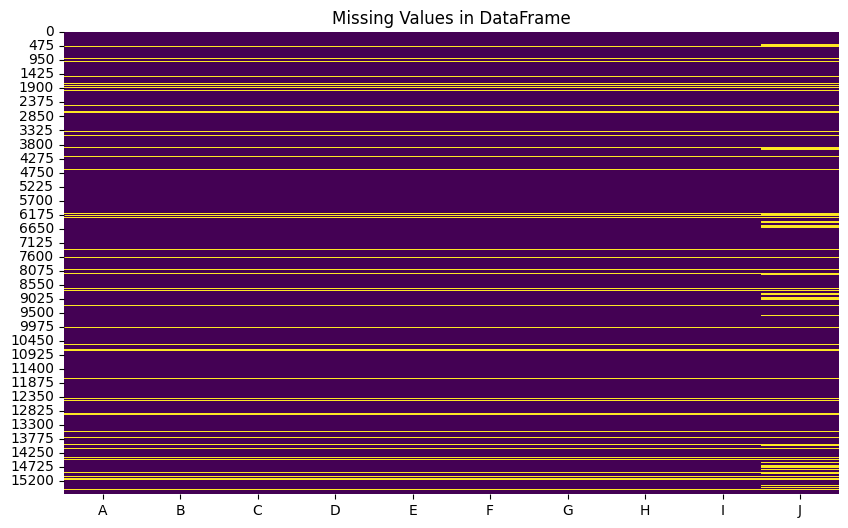

In [ ]:
# prompt: df_concat seaborn plot of Nan on the df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_concat.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

In [ ]:
# prompt: df_concat['A'] its == Nan matrix drop

# Remove linhas onde a coluna 'A' (CÓDIGO PRODUTO) possui valores NaN
df_concat = df_concat.dropna(subset=['A'])


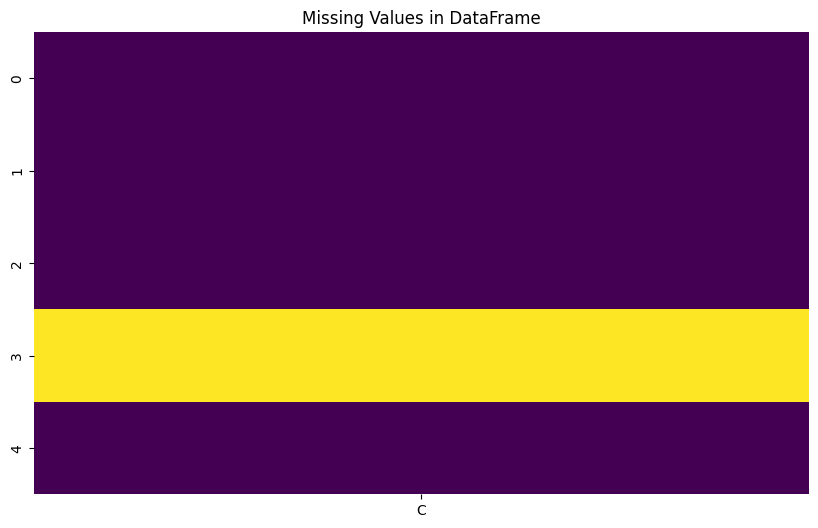

In [ ]:
# prompt: df_concat seaborn plot of Nan on the df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_concat.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

**cleaning QUANTITY of itens**

In [ ]:
def extract_number(value):
    # Convert value to string
    match = re.search(r'\d+', str(value))
    # Return the number as an integer if found, otherwise return 0
    return int(match.group(0)) if match else 0

# Apply the function hierarchically
def extract_number_hierarchical(row):
    # Try to get the number from 'G', if not valid, then from 'H', and finally from 'I'
    number = extract_number(row['G'])
    if number == 0:
        number = extract_number(row['H'])
    if number == 0:
        number = extract_number(row['I'])
    return number

# Apply the hierarchical extraction function to each row
df_concat['Quant_Clean'] = df_concat.apply(extract_number_hierarchical, axis=1)

In [ ]:
# prompt: df_concat["G"].value_counts().sort_index() str

print(df_concat["Quant_Clean"].value_counts().sort_index().to_string())


Quant_Clean
0         4
1      4388
2      5044
3      2278
4       851
5       300
6       492
7         6
8       102
9        15
10       34
12      703
13        4
14        3
15       17
16        3
18        5
19        3
20        5
21        1
24       53
26        1
30        3
36       15
40        2
48        2
60        2
72        1
78        1
144       4
165       1
200       1
425       1
500       1


**Clining unity price of items**

Notice that on the process Valor Unit was split in two columns but can be reorganizaed


In [ ]:
# prompt: save df_concat as csv and read df_concat from csv

# Save df_concat as CSV
#df_concat.to_csv('df_concat.csv', index=False)

# Read df_concat from CSV
df_concat = pd.read_csv('df_concat.csv')
df_concat

,A,B,C,D,E,F,G,H,I,J,Quant_Clean
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN,12
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12
...,...,...,...,...,...,...,...,...,...,...,...
14341,23557013,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2
14342,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3
14343,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3
14344,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2


In [ ]:
def extract_numbers(value):
    # Find all sequences of digits that may include a comma for decimals
    matches = re.findall(r'\d+,\d+', str(value))
    # Convert them to floats, replacing commas with periods for proper float format
    numbers = [float(match.replace(',', '.')) for match in matches]
    # Return the list of float numbers
    return numbers

# Apply the function hierarchically
def extract_min_number(row):
    # Extract numbers from columns 'G', 'H', 'I' as floats
    numbers = []

    # Check for numbers in 'G'
    numbers += extract_numbers(row['H'])

    # If no valid numbers found in 'G', proceed to 'H'
    if not numbers:
        numbers += extract_numbers(row['I'])

    # If no valid numbers found in 'H', proceed to 'I'
    if not numbers:
        numbers += extract_numbers(row['J'])

    # If still no valid numbers, return NaN, otherwise return the minimum number
    return min(numbers) if numbers else np.nan

# Apply the hierarchical extraction function to each row
df_concat['Extracted_Min'] = df_concat.apply(extract_min_number, axis=1)
df_concat

,A,B,C,D,E,F,G,H,I,J,Quant_Clean,Extracted_Min
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN,12,21.39
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65
...,...,...,...,...,...,...,...,...,...,...,...,...
14341,23557013,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00
14342,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00
14343,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00
14344,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00


In [ ]:
# prompt: NEW COLUMN Quant_Clean 	TIMES Extracted_Min

df_concat['Total_Value'] = df_concat['Quant_Clean'] * df_concat['Extracted_Min']
df_concat

,A,B,C,D,E,F,G,H,I,J,Quant_Clean,Extracted_Min,Total_Value
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN,12,21.39,256.68
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,23557013,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00
14342,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00
14343,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00
14344,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00


In [ ]:
# prompt: save df_concat as csv and read df_concat from csv

# Save df_concat as CSV
#df_concat.to_csv('df_concat.csv', index=False)

# Read df_concat from CSV
df_concat = pd.read_csv('df_concat.csv')
df_concat

,A,B,C,D,E,F,G,H,I,J,Quant_Clean,Extracted_Min,Total_Value
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN,12,21.39,256.68
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,23557013,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00
14342,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00
14343,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00
14344,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00


All the values were find, need to go to BNDES web site to see whats  -NCM/SH -
financiable or not

In [ ]:
# prompt: df_concat["C"].unique()

array = df_concat["C"].unique()


In [ ]:
# prompt: clean array to have only numbers

import re

def clean_array(array):
  """
  Cleans an array to contain only numbers.

  Args:
    array: The input array.

  Returns:
    A new array containing only numbers.
  """
  cleaned_array = []
  for item in array:
    # Remove any non-numeric characters using regular expressions
    cleaned_item = re.sub(r"[^0-9]", "", str(item))
    if cleaned_item:  # Check if the cleaned item is not empty
      cleaned_array.append(int(cleaned_item))
  return cleaned_array

# Apply the function to your array
cleaned_array = clean_array(array)


In [ ]:
# prompt: cleaned_array unique

unique_cleaned_array = set(cleaned_array)
unique_cleaned_array


{19011090,
 39203000,
 39205900,
 39269090,
 42021210,
 42021220,
 42022100,
 42022210,
 42022220,
 42023200,
 42023900,
 42029200,
 42033000,
 44149000,
 49111090,
 57029200,
 61034300,
 61061000,
 61099000,
 61151099,
 61152100,
 61159500,
 61159600,
 61161000,
 61178090,
 62034300,
 62122000,
 62171000,
 63072000,
 64019990,
 64021900,
 64022000,
 64029190,
 64029990,
 64034000,
 64039190,
 64039990,
 64041100,
 64041900,
 64051010,
 64051090,
 64052000,
 64059000,
 65050011,
 65050012,
 65069900,
 71132000,
 71171900,
 71179000,
 84142000,
 84145110,
 84145990,
 85164000,
 91021110,
 91021210,
 91021900,
 91022100,
 94032090,
 94036000,
 94042900,
 94049000,
 95030099,
 95066200,
 95069900,
 96170010}

In [ ]:
# prompt: from each on of unique_cleaned_array, maque a df find one exemplo of them on df_concat and get the following df_concat['D']( has a int) value in a new dataframe

import pandas as pd

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['NCM', 'Valor'])

# Iterate over the unique cleaned array
for ncm in unique_cleaned_array:
    # Find one example of the NCM in df_concat
    example = df_concat[df_concat['C'].apply(lambda x: str(x).replace('.', '').replace(',', '') == str(ncm))].iloc[0]

    # Get the value of df_concat['D'] as an integer
    valor = int(example['D'])

    # Create a new row for the result DataFrame
    new_row = pd.DataFrame({'NCM': [ncm], 'Valor': [valor]})

    # Concatenate the new row to the result DataFrame
    result_df = pd.concat([result_df, new_row], ignore_index=True)

# Display the result DataFrame
print(result_df)


         NCM Valor
0   63072000   500
1   64029190   500
2   44149000     0
3   61061000     0
4   64041100   500
..       ...   ...
60  61178090     0
61  64022000     0
62  62171000     0
63  61151099   101
64  62034300     0

[65 rows x 2 columns]


In [ ]:
# prompt: result_df to csv /content/drive/MyDrive/120/Notas fiscais final

result_df.to_csv('/content/drive/MyDrive/120/Notas fiscais final/result_df.csv', index=False)


In [ ]:
# prompt: open /content/drive/MyDrive/120/Notas fiscais final/Resultado_consulta.csv

import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/120/Notas fiscais final/Resultado_consulta.csv')

# Display the DataFrame
df


,NCM,CST,Financiável
0,6307.20.00,500,Sim
1,6402.91.90,500,Sim
2,4414.90.00,0,Sim
3,6106.10.00,0,Sim
4,6404.11.00,500,Sim
...,...,...,...
60,6117.80.90,0,Sim
61,6402.20.00,0,Sim
62,6217.10.00,0,Sim
63,6115.10.99,101,Não


In [ ]:
# prompt: df['NCM] int drop the '.'

df['NCM'] = df['NCM'].astype(str).str.replace('.', '').astype(int)
df

,NCM,CST,Financiável
0,63072000,500,Sim
1,64029190,500,Sim
2,44149000,0,Sim
3,61061000,0,Sim
4,64041100,500,Sim
...,...,...,...
60,61178090,0,Sim
61,64022000,0,Sim
62,62171000,0,Sim
63,61151099,101,Não


In [ ]:
# prompt: if df[Financiável] == sim new_df

# Create a new DataFrame with only the rows where 'Financiável' is 'sim'
new_df = df[df['Financiável'] == 'Sim']
new_df

,NCM,CST,Financiável
0,63072000,500,Sim
1,64029190,500,Sim
2,44149000,0,Sim
3,61061000,0,Sim
4,64041100,500,Sim
5,64021900,500,Sim
6,39205900,0,Sim
7,64059000,0,Sim
8,62122000,500,Sim
11,64051090,0,Sim


In [ ]:
# prompt: DF_CONCAT['C'] MAP WITH new_df['NCM']

# Merge df_concat with new_df based on the 'C' column in df_concat and 'NCM' column in new_df
df_concat = df_concat.merge(new_df[['NCM', 'Financiável']], left_on='C', right_on='NCM', how='left')

# Display the updated df_concat DataFrame
df_concat


,A,B,C,D,E,F,G,H,I,J,Quant_Clean,Extracted_Min,Total_Value,NCM,Financiável
0,27609,0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80,64029990.0,Sim
1,27611,0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...,64029990,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,94",NaN,12,35.65,427.80,64029990.0,Sim
2,27588,0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","21,3900 256,68","0,00 256,68 17,97",NaN,12,21.39,256.68,64022000.0,Sim
3,27910,06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80,64022000.0,Sim
4,27912,06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...,64022000,0.0,6101.0,PR,"12,0000","35,6500 427,80","0,00 427,80 29,95",NaN,12,35.65,427.80,64022000.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,23557013,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00,64029990.0,Sim
14342,23557015,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00,64029990.0,Sim
14343,23557019,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"3,0000","43,0","300 129,0","9 0,00",3,43.00,129.00,64029990.0,Sim
14344,23557023,SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....,64029990,500.0,6101.0,PAR,"2,0000","43,0","300 86,0","6 0,00",2,43.00,86.00,64029990.0,Sim


In [ ]:
# prompt: Total_Value sum

total_sum = df_concat['Total_Value'].sum()
print(f"Total sum of Total_Value: {total_sum}")


Total sum of Total_Value: 1692646.3562


In [ ]:

def clean_column(column):
    """
    Cleans a DataFrame column to contain only numbers.

    Args:
        column: The input DataFrame column.

    Returns:
        A Series with only numeric values.
    """
    def extract_number(item):
        # Remove any non-numeric characters using regular expressions
        cleaned_item = re.sub(r"[^0-9]", "", str(item))
        if cleaned_item:  # Check if the cleaned item is not empty
            return int(cleaned_item)
        return None  # Return None if no number was found

    # Apply the function to each item in the column
    return column.apply(extract_number)

# Example usage with DataFrame

df_concat['C'] = clean_column(df_concat['C'])



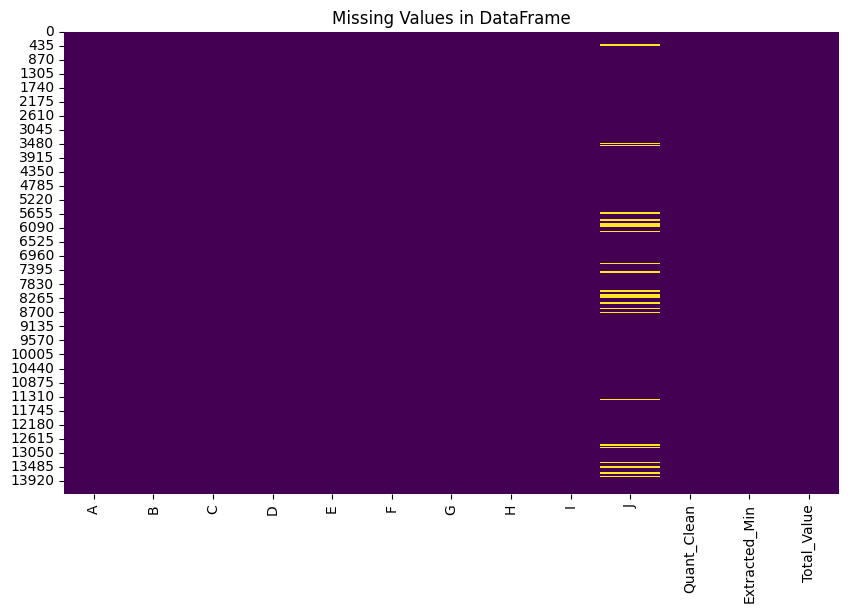

In [ ]:
# prompt: df_concat seaborn plot of Nan on the df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_concat.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

In [ ]:
# prompt: df_concat to excel versão final notas /content/drive/MyDrive/120/Notas fiscais final

# Save df_concat to an Excel file
df_concat.to_excel('/content/drive/MyDrive/120/Notas fiscais final/versão final notas.xlsx', index=False)
